In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def normalize(data):
    
    # [-1 1]  Data Normalization 
    
    max_data,min_data = max(data),min(data)
    norm_data = ((data-min_data)/(max_data-min_data))*2-1
    return norm_data

In [4]:
file = pd.read_csv('parsed_file.csv',skiprows=1,names = ['Action Performed','Connection Classification','Priority','Date-Time','Source IP','Source Port','Destination IP','Destination Port','Protocol','TimeToLive','TypeOfService','ID','IP Length','DataGram Length', 'Frag Offset', 'Frag Size', 'Flag -2','Flag-1', 'Flag-U', 'Flag-A', 'Flag-P', 'Flag-R', 'Flag-S', 'Flag-F','All Flags','Seq', 'Ack', 'Win', 'TCP length', 'TCP Options', 'NOP NOP TS', 'MSS', 'NOP WS', 'SackOK TS'],low_memory=False)

In [5]:
file.tail()

,Action Performed,Connection Classification,Priority,Date-Time,Source IP,Source Port,Destination IP,Destination Port,Protocol,TimeToLive,...,All Flags,Seq,Ack,Win,TCP length,TCP Options,NOP NOP TS,MSS,NOP WS,SackOK TS
25736,(http_inspect) ANOMALOUS HTTP SERVER ON UNDEF...,,3,1573565467,134.240.18.13,8014,134.240.12.190,3100,TCP,127,...,***A****,0xC63A4598,0x9BFB1253,0xFC4E,20.0,NaN,NaN,NaN,NaN,NaN
25737,(http_inspect) ANOMALOUS HTTP SERVER ON UNDEF...,,3,1573565468,134.240.18.13,8014,134.240.12.190,3101,TCP,127,...,***AP***,0x6885BC0B,0x60CE1819,0xFACF,20.0,NaN,NaN,NaN,NaN,NaN
25738,(http_inspect) ANOMALOUS HTTP SERVER ON UNDEF...,,3,1573565468,134.240.18.13,8014,134.240.12.190,3102,TCP,127,...,***AP***,0xBA29554C,0x3FFEA106,0xFA64,20.0,NaN,NaN,NaN,NaN,NaN
25739,BAD-TRAFFIC IP Proto 103 PIM,Detection of a non-standard protocol or event,2,1573565496,134.240.12.254,,224.0.0.13,,PIM,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25740,BAD-TRAFFIC IP Proto 103 PIM,Detection of a non-standard protocol or event,2,1573565525,134.240.12.254,,224.0.0.13,,PIM,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Column-1 :Connection Class

In [6]:
conn_class = np.ones(len(file),dtype=int)

In [7]:
class0_ind = file.index[file['Connection Classification']==' '].tolist()

In [8]:
conn_class[class0_ind]=0

In [10]:
# Column-2: Priority

In [11]:
priority = file['Priority'].tolist()

In [12]:
# Column-3: Unix TimeStamp

In [13]:
unix_time = np.array(file['Date-Time'],dtype=float)
norm_timestamp = normalize(unix_time)

In [14]:
# Column-4: Source Port

In [15]:
file.loc[file['Source Port']==' ','Source Port']=0
src_port = np.array(file['Source Port'],dtype=float)
norm_src_port = normalize(src_port)

In [16]:
# Column-5: Destination Port

In [17]:
file.loc[file['Destination Port']==' ','Destination Port']=0
dest_port = np.array(file['Destination Port'],dtype=float)
norm_dest_port = normalize(dest_port)

In [18]:
# Column-6: Protocol

In [19]:
tcp_ind = file.index[file['Protocol']=='TCP'].tolist()
pim_ind = file.index[file['Protocol']=='PIM'].tolist()
icmp_ind = file.index[file['Protocol']=='ICMP'].tolist()
udp_ind = file.index[file['Protocol']=='UDP'].tolist()

protocol = np.zeros(len(file),dtype=int)

protocol[icmp_ind] = 1
protocol[pim_ind] = 2
protocol[tcp_ind] = 3
protocol[udp_ind] = 4

In [20]:
# Column-7: TTL

In [21]:
ttl = np.array(file['TimeToLive'],dtype=float)
norm_ttl = normalize(ttl)

In [22]:
# Column-8: TOS

In [23]:
x0_ind = file.index[file['TypeOfService']=='0x0 '].tolist()
x10_ind = file.index[file['TypeOfService']=='0x10 '].tolist()
xc0_ind = file.index[file['TypeOfService']=='0xC0 '].tolist()

tos = np.zeros(len(file),dtype=int)

tos[x0_ind] = 1
tos[x10_ind] = 2
tos[xc0_ind] = 3


In [24]:
# Column-9: Datagram length

In [25]:
dgm_len = np.array(file['DataGram Length'],dtype=float)
norm_dgm_len = normalize(dgm_len)

In [33]:
# Column-10:Flag-A

In [39]:
flag_set_ind = file.index[file['Flag-A']=='A'].tolist()
flag_a = np.zeros(len(file),dtype=int)
flag_a[flag_set_ind] = 1



# Column-11:Flag-P
flag_set_ind = file.index[file['Flag-P']=='P'].tolist()
flag_p = np.zeros(len(file),dtype=int)
flag_p[flag_set_ind] = 1



# Column-12:Flag-R
flag_set_ind = file.index[file['Flag-R']=='R'].tolist()
flag_r = np.zeros(len(file),dtype=int)
flag_r[flag_set_ind] = 1


# Column-13:Flag-S
flag_set_ind = file.index[file['Flag-S']=='S'].tolist()
flag_s = np.zeros(len(file),dtype=int)
flag_s[flag_set_ind] = 1


# Column-14:Flag-F
flag_set_ind = file.index[file['Flag-F']=='F'].tolist()
flag_f = np.zeros(len(file),dtype=int)
flag_f[flag_set_ind] = 1

In [40]:
# Column-15: Win

In [75]:
win = np.zeros(len(file),dtype=int)

In [41]:
# Column-16:TCP Length

In [51]:
ind20 = file.index[file['TCP length']==20].tolist()
ind24 = file.index[file['TCP length']==24].tolist()
ind28 = file.index[file['TCP length']==28].tolist()
ind32 = file.index[file['TCP length']==32].tolist()
ind36 = file.index[file['TCP length']==36].tolist()
ind40 = file.index[file['TCP length']==40].tolist()

tcp_len = np.zeros(len(file),dtype=int)

tcp_len[ind20]=1
tcp_len[ind24]=2
tcp_len[ind28]=3
tcp_len[ind32]=4
tcp_len[ind36]=5
tcp_len[ind40]=6


In [42]:
# Column-17:TCP options

In [82]:
tcp_opt = file['TCP Options'].fillna(0).tolist()
tcp_opt = [round(x) for x in tcp_opt]

In [91]:
labels = pd.DataFrame(conn_class,columns=['Class'])
col_names = ['Priority','Unix TimeStamp', 'Source port', 'Destination port', 'Protocol','TTL','TOS','Datagram Length','A','P','R','S','F','Win','TCP length','TCP options']
dataset = pd.DataFrame(list(zip(priority,norm_timestamp,norm_src_port,norm_dest_port,protocol,norm_ttl,tos,norm_dgm_len,flag_a,flag_p,flag_r,flag_s,flag_f,win,tcp_len,tcp_opt)),columns=col_names)

In [93]:
dataset.to_csv(r'Dataset.csv',index=False)
labels.to_csv(r'Classes.csv',index=False)

In [25]:
file['Connection Classification'].unique()

array([' ', 'Attempted Information Leak ',
       'access to a potentially vulnerable web application ',
       'Attempted Administrator Privilege Gain ',
       'Web Application Attack ', 'Attempted User Privilege Gain ',
       'Potentially Bad Traffic ', 'Attempted Denial of Service ',
       'Executable code was detected ', 'Misc activity ', 'Misc Attack ',
       'Attempt to login by a default username and password ',
       'A Network Trojan was detected ',
       'Detection of a non-standard protocol or event '], dtype=object)

In [32]:
o = file[file['Connection Classification']=='Executable code was detected ']
t = file[file['Connection Classification']=='Web Application Attack ']
th = file[file['Connection Classification']=='Attempted Denial of Service ']
f = file[file['Connection Classification']=='access to a potentially vulnerable web application ']
fv = file[file['Connection Classification']=='Attempted User Privilege Gain ']

In [37]:
y = [len(o),len(t),len(th),len(f),len(fv)]
x = ['Executable code', 'Web Application Attack','Denial of Service','vulnerable web application','User Privilege Gain']

Text(0.5, 1.0, 'Number of connections executing 5 attacks within malicious class')

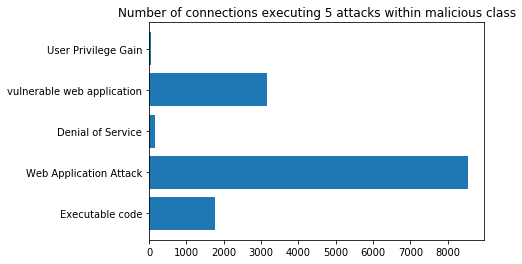

In [45]:
plt.barh(x,y)
plt.title('Number of connections executing 5 attacks within malicious class')